# 关于Express

## Express的工作原理

- Express与我们前面写的Http Server一样的工作原理，但是封装了更加丰富强大的功能：
    1. 创建Http Server
    2. 更加方便的处理请求Request与相应Response
        - get请求方法
        - post请求方法
    3. 求URL的资源（Web页面）路由
        - 资源管理规范
    4. 强大Web页面结构模板；
    5. 同时提供了数据处理与解析的相关模块：
        - body-parer:处理JSON，Text等数据
        - cookie-parser：处理Cookie
        - multer:处理表单上传数据

## Express的安装

- 为了不污染系统的node_modules，采用当前项目安装。
     - 首先创建一个工程；
     - 然后在该工程目录下安装；
     - 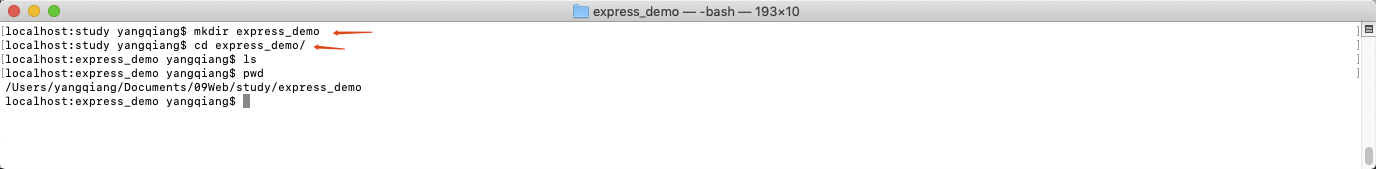

- express安装指令：
    - `npm install express`
        - 没有采用全局安装，全局安装某些时候需要root权限。
        - 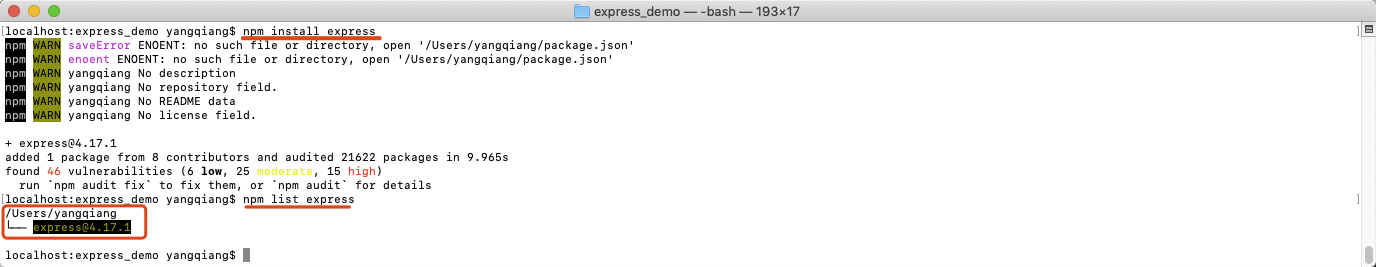

# 使用模式

## Express开发模式主要步骤

1. 创建express对象
2. 定义访问url-pattern
3. 使用express对象启动HTTP服务

## 代码示例

```javascript

    // 第 01 步
    // 引入express类
    var express = require('express');
    // 创建express对象
    var app = express();

    // 第 02 步
    app.get('/index.html', function (req, res) {
        // 响应头等通信细节，都由Express框架自动处理，这里只需要直接发送数据，也可以加载html资源发送。
       var html = '<!doctype html>';
       html += '<html>';
       html += '<head><title>Express例子</title><meta charset="uft-8"></head>';
       html += '<body>';
       html += 'Express框架';
       html += '</body>';
       html += '</html>';

       res.send(html);

    })


    // 第 03 步
    var server = app.listen(
        9999, 
        function () {
            var host = server.address().address;
            var port = server.address().port;
            console.log("Web服务器启动，访问地址为 http://%s:%s", host, port);
        }
    );


```

## 运行测试

1. 启动服务器程序
    - `node e01_express_server.js `

2. 使用浏览器访问
    - 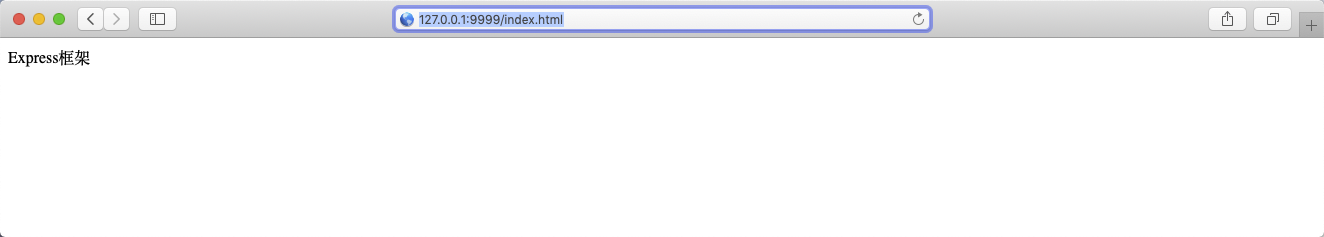

# Express核心组件

## Express核心组件说明

- Express的核心组件的可以从帮助文档获取
    - `http://www.expressjs.com.cn/4x/api.html`
        - Application: express类
        - Request类
        - Response类
        - Router类
    - 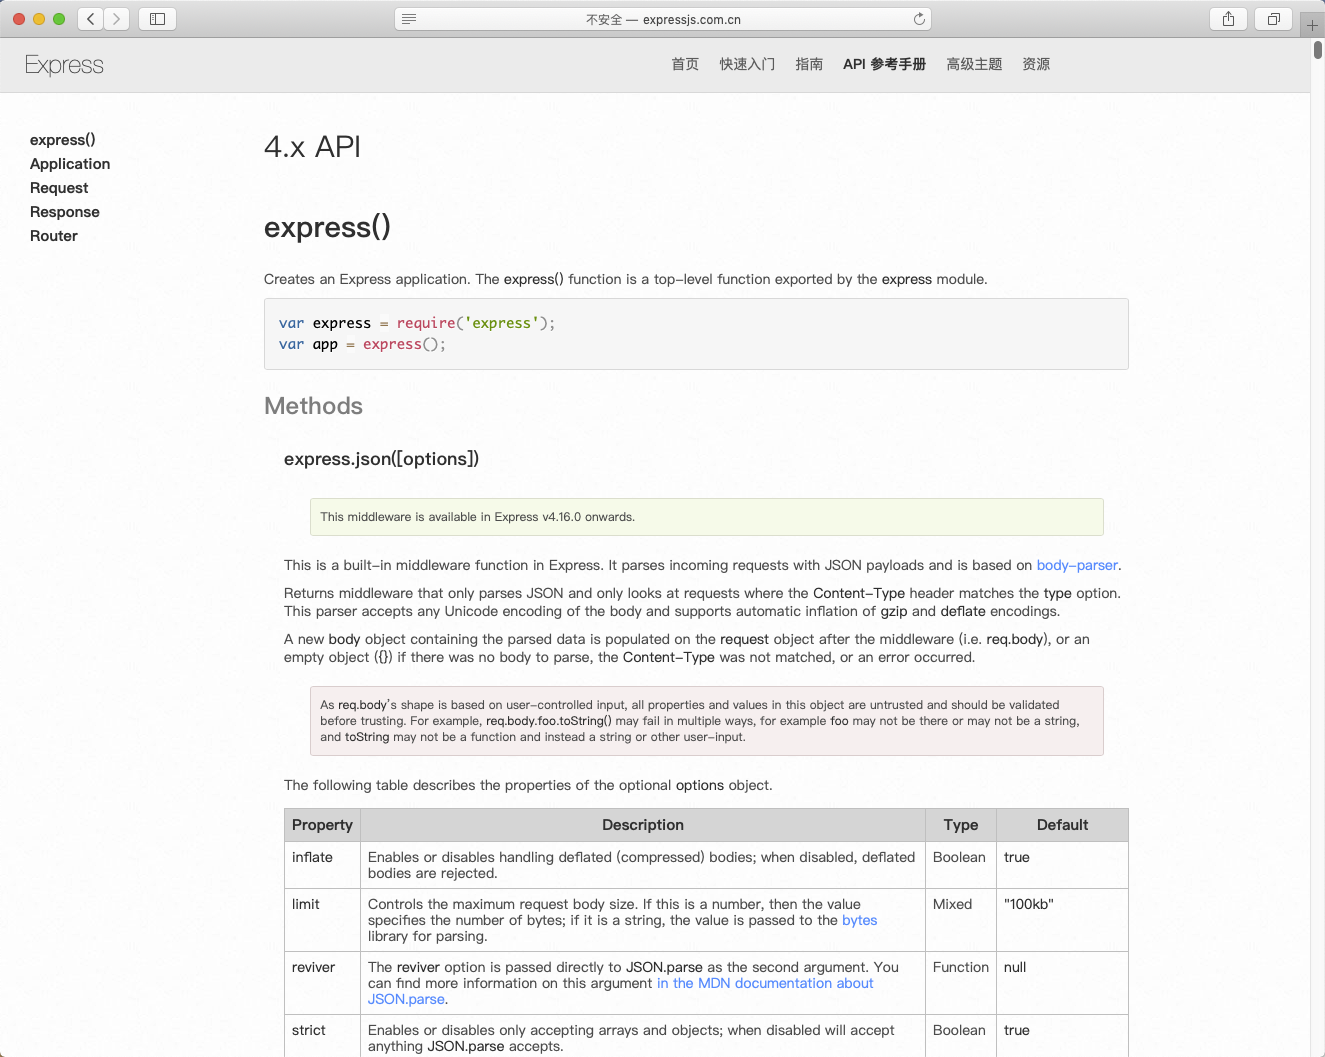

- 上面几个核心组件合作关系相对来说还是比较复杂，所以express提供了一个工具express-genertor来创建一个结构化的express项目

## express-generator

### 安装

- 因为要使用express工具，需要全局安装，安装指令：
    - `sudo npm install express express-generator -g --unsafe-perm`
    - 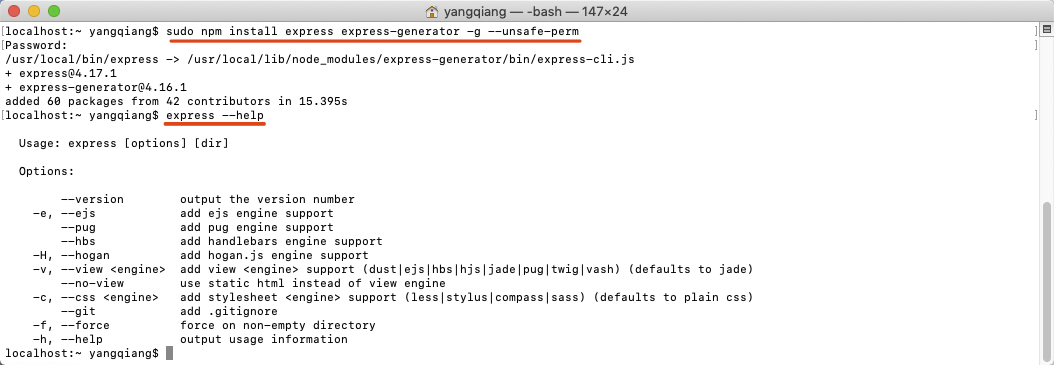

### 创建express项目

- 创建指令（默认是jade模板）
    - `express jade_demo`
    - 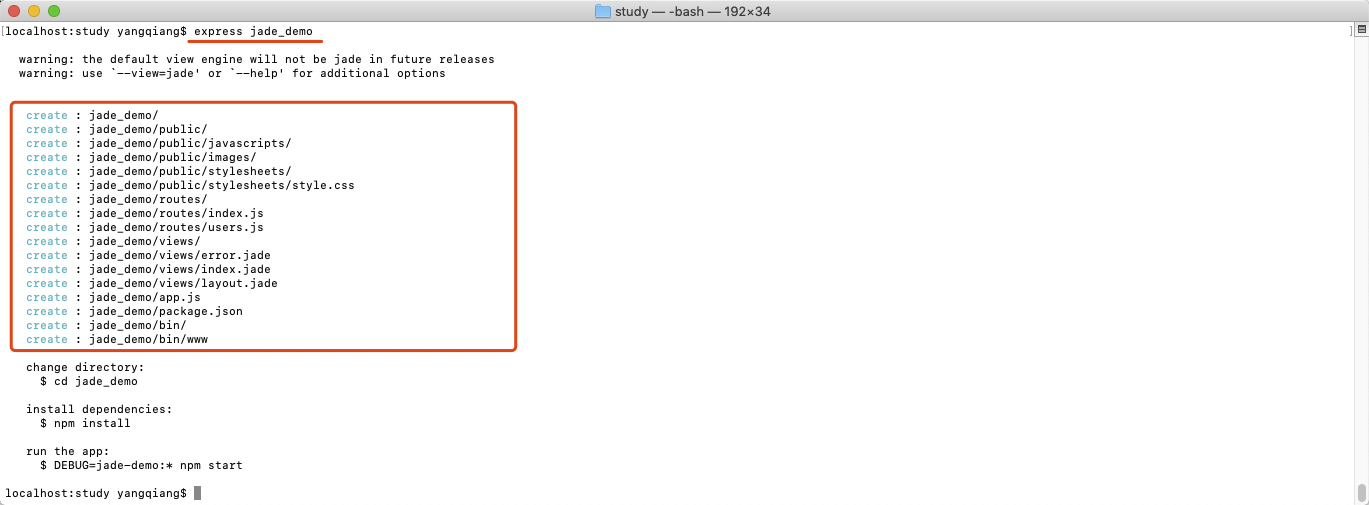

### express项目结构解析

- express的项目结构目录如下：
    - 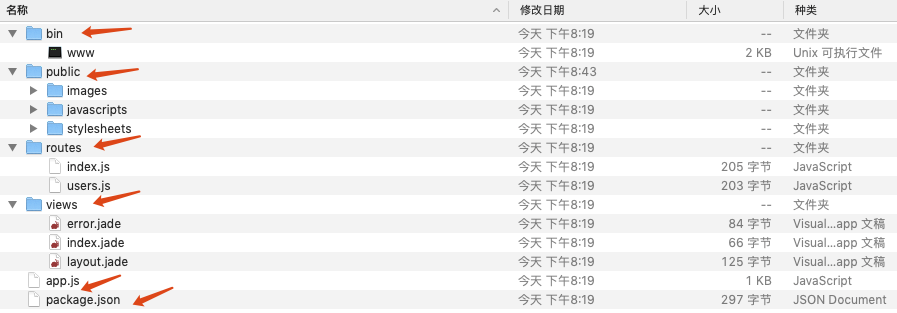

- 目录说明：（MVC）
    - bin：Http服务器的js脚本，使用node可以直接执行
    - public：浏览器可以直接使用的静态资源（CSS，浏览器使用的js脚本，HTML，图像等资源）
    - routes：路由器对象封装（属于模式层接口）
    - views：jade，pug或者ejs模板视图文件（视图层）
    - app.js：Express的核心配置（可以作为控制器）
    - package.json：所有项目模块的依赖配置等
        - 其中配置了使用npm可以直接运行的脚本配置：`"start": "node ./bin/www"`
    

- 启动服务
    - `node ./bin/www`
    - npm start
    
    - 注意：
        - 运行缺少包的错误提示，可以自行安装；
            - 我运行的时候补安装了两个：cookie-parser 与morgan模块
            - 运行时，还需要安装jade或者pug（pug是jade升级版本，jade不推荐使用了）
        - 环境依赖安装大招：
            - 使用npm install安装相关依赖；
            - 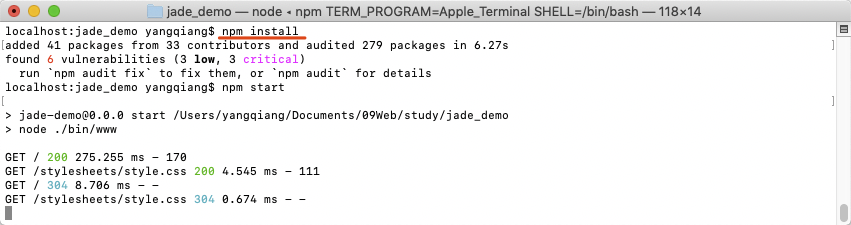

# 模板

- Express提供三种模板支持：
    1. jade（被pug替代，不推荐使用，下面可以看看不推荐的理由，晦涩的语法，与HTML不同的语法）
    2. pug（Jade的升级版本）
    3. ejs
    4. hbs（handlebars）
    5. hogan
    
- 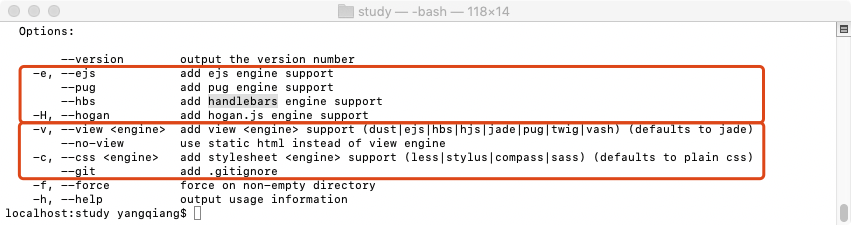

## jade模板语法例子

- 这种语法规则需要重新学习，起码得熟悉下才能使用，不是可以直接上手的。

```html
    doctype html
    html
      head
        title= title
        link(rel='stylesheet', href='/stylesheets/style.css')
      body
        block content

```

## pug模板语法例子

- jade的升级版本

```html
    extends layout

    block content
      h1= title
      p Welcome to #{title}

```

## ejs模板语法例子

- 推荐使用ejs，这个与asp，jsp类似的常规语法，学习成本低。

```html
    <!DOCTYPE html>
    <html>
      <head>
        <title><%= title %></title>
        <link rel='stylesheet' href='/stylesheets/style.css' />
      </head>
      <body>
        <h1><%= title %></h1>
        <p>Welcome to <%= title %></p>
      </body>
    </html>

```

## hbs模板语法例子

- 采用框架结构与操作区分隔的方式，灵活性不足

```html
    <!DOCTYPE html>
    <html>
      <head>
        <title>{{title}}</title>
        <link rel='stylesheet' href='/stylesheets/style.css' />
      </head>
      <body>
        {{{body}}}
      </body>
    </html>

```

## hogan模板语法例子

- 采用ejs与jade的综合方便语法

```html
    <!DOCTYPE html>
    <html>
      <head>
        <title>{{ title }}</title>
        <link rel='stylesheet' href='/stylesheets/style.css' />
      </head>
      <body>
        <h1>{{ title }}</h1>
        <p>Welcome to {{ title }}</p>
      </body>
    </html>

```

## engine与View engine的区别

- engine用来把模板翻译成html，只支持如下五种：
    1. jade
    2. pug
    3. ejs
    4. hbs
    5. hogan

- view engine是设置模板的扩展名，在代码中是不要指定扩展名的
    - `*.jade`
    - `*.dust`
    - `*.ejs`
    - `*.hbs`
    - `*.hjs`
    - `*.pug`
    - `*.twig`
    - `*.vash`
    - `no view`直接使用html
        - 使用静态的资源，不支持视图数据层。

----
- 4大核心组件的详细说明，因为不是主要目标，这里暂时不详细介绍，先留白。

1. `# Router组件`
    - 负责用户访问的逻辑url-pattern（前）与实际页面（后）服务渲染的映射关系；

2. `# Response组件`
    - 负责http相应，包含页面渲染的调用服务（页面渲染的实际实现再Application对象中实现）；
        - 包括传递给渲染器（renderer）的数据

3. `# Request组件`
    - 负责用户的请求处理，包含表单数据，上传数据的处理；

4. `# Application组件`
    - 负责一些配置与公共功能的实现；

----

# 参考资源

- Express的官网参考：http://www.expressjs.com.cn/4x/api.html
- 模块环境的安装：直接使用npm start安装
- 服务器启动：直接使用npm start

----